In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [24]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


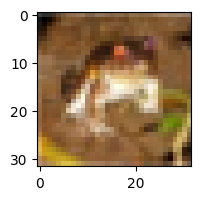

In [26]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])

In [27]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We notice that the y_train variable is a 2D array, so we have to reshape it. Also we do not need it as an array

In [43]:
# Reshaping 
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print(y_train[:5])

[6 9 9 4 1]


In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [30]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

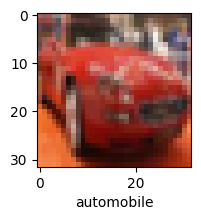

In [31]:
plot_sample(X_train, y_train, 5)

In [32]:
# Scaling the images
X_train = X_train / 255
X_test = X_test / 255

In [36]:
cnn = Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation="softmax")
])

In [40]:
cnn.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [41]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5117 - accuracy: 0.4513
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1858 - accuracy: 0.5809
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0619 - accuracy: 0.6277
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9904 - accuracy: 0.6539
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9346 - accuracy: 0.6726
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8871 - accuracy: 0.6905
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8488 - accuracy: 0.7050
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8113 - accuracy: 0.7177
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7790 - accuracy: 0.7284
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [42]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9384 - accuracy: 0.6818


[0.9383798837661743, 0.6818000078201294]

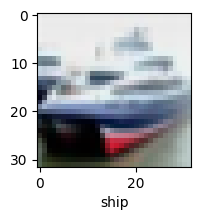

In [44]:
plot_sample(X_test, y_test, 1)

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.45069008e-04, 2.54049839e-04, 1.40375202e-03, 7.60193288e-01,
        2.77157850e-03, 9.66074914e-02, 1.20486319e-01, 1.68150254e-05,
        1.79972574e-02, 2.43906561e-05],
       [5.74766798e-03, 2.84610409e-02, 3.68186406e-08, 5.30336752e-09,
        3.34700836e-08, 1.45603113e-10, 1.15855381e-09, 3.24639135e-11,
        9.65228319e-01, 5.62874135e-04],
       [6.50337040e-02, 1.93717539e-01, 3.25244572e-03, 1.22782895e-02,
        4.01668425e-04, 1.58794480e-03, 4.07372275e-03, 3.51299648e-04,
        6.71922743e-01, 4.73806523e-02],
       [8.94300640e-01, 2.23629531e-02, 3.18606710e-03, 6.30330411e-04,
        2.75786361e-03, 1.74462810e-04, 8.41794244e-04, 3.03436047e-03,
        6.42557293e-02, 8.45573843e-03],
       [6.20248056e-06, 9.01089152e-06, 4.06058785e-03, 2.41808295e-02,
        7.19942153e-01, 9.23478918e-04, 2.50732481e-01, 1.34303891e-05,
        1.29575492e-04, 2.30035675e-06]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)